Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import plotly.express as px

In [24]:
df = pd.read_csv('Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [26]:
df.describe().round(2)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.0,161.00,161.00,161.00,161.00,161.00
mean,675.56,2215.60,621.47,170.43,5.21,335.06,4.86,1.50,24.5,2.20,10.38,4.50,2842.11,8.92
std,410.85,768.19,1546.62,92.89,1.51,134.83,2.44,0.60,28.8,1.61,6.18,4.34,1366.99,2.19
min,10.00,614.00,10.00,66.00,1.40,121.00,0.00,0.00,0.0,0.00,0.00,0.00,800.00,5.10
25%,237.00,1734.00,37.00,134.10,4.80,233.00,4.00,1.20,8.0,1.00,5.00,0.00,2040.00,7.60
50%,774.00,2258.00,106.00,153.00,5.15,294.00,4.00,1.40,16.0,2.00,12.00,5.00,2800.00,8.40
75%,1026.00,2744.00,382.00,170.00,5.50,428.00,8.00,1.88,32.0,3.00,16.00,8.00,3240.00,9.80
max,1339.00,4361.00,9807.00,753.00,12.20,806.00,8.00,2.70,128.0,6.00,23.00,20.00,9500.00,18.50


In [27]:
df.shape

(161, 14)

In [28]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

#### Understanding the data

<AxesSubplot:>

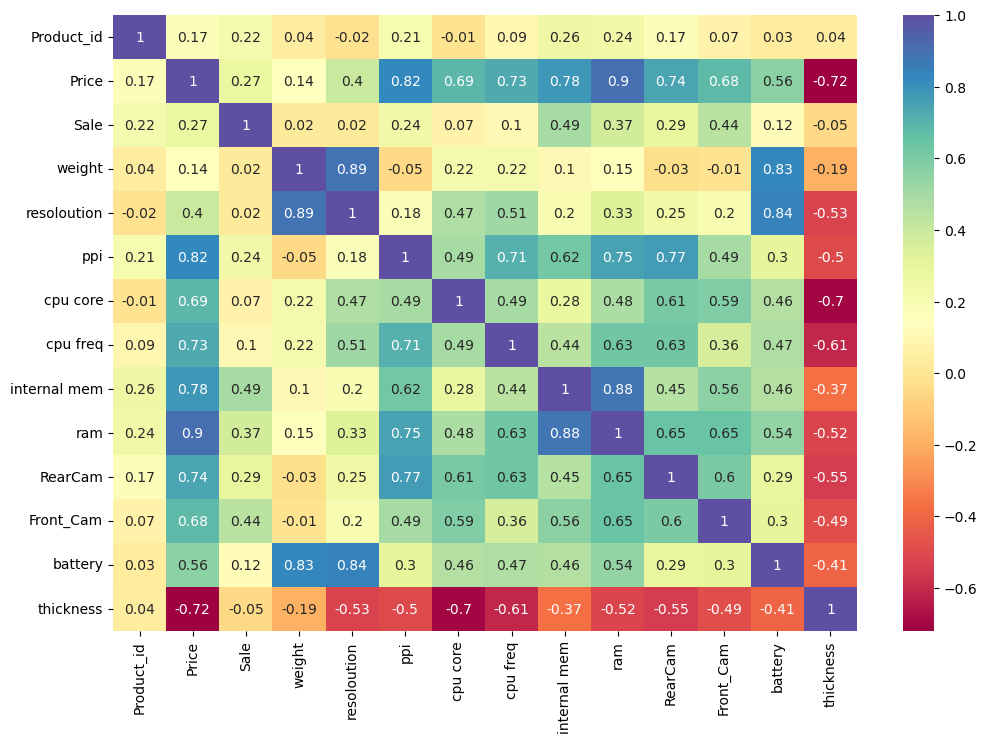

In [29]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr().round(2), cmap='Spectral', annot=True)

From the above, we see the data is what we we expect. The prce is positively correlated with ram, PPI(Pixels per inch), internal Memory, rear camera, cpu_frequency, cpu_cores, front_camera, and battery.

It is also negatively correlated with the thickness of teh phone, as we would expect, the slimmer the phone the higher the price

In [30]:
#We need to see if there are any outliers in the price data
px.box(df, x='Price')

We can see taht there are outliers and thus we have to remove it from our dataset

In [31]:
out = list(np.where(df['Price']>3837))
out=list(out[0])

i=0
while i<len(out):
    df.drop(out[i],axis = 0, inplace=True)
    i=i+1

df.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='ram', ylabel='Price'>

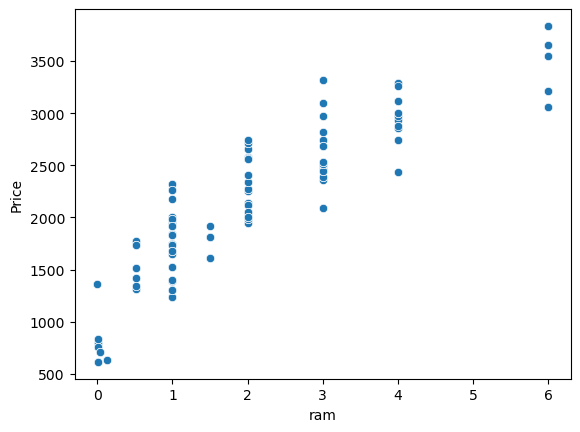

In [34]:
sb.scatterplot(data=df, x='ram', y='Price')

<AxesSubplot:xlabel='ppi', ylabel='Price'>

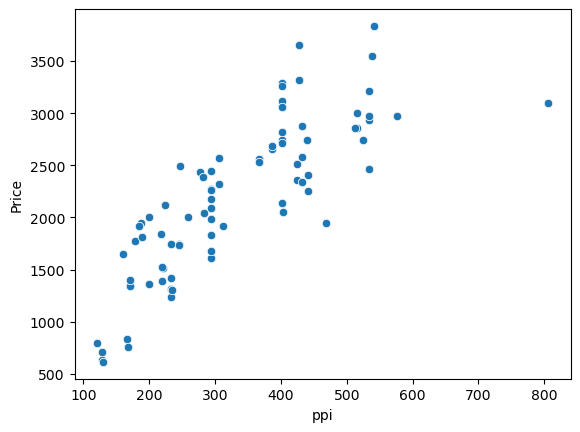

In [36]:
sb.scatterplot(data=df, x='ppi', y='Price')

<AxesSubplot:xlabel='thickness', ylabel='Price'>

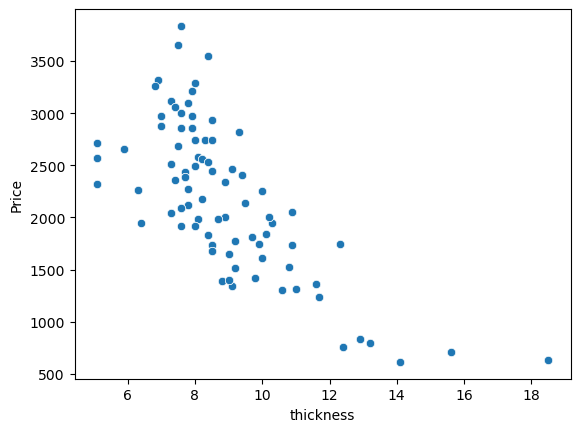

In [40]:
sb.scatterplot(data=df, x='thickness', y='Price')

### The Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [45]:
X=df[['ram', 'ppi', 'internal mem', 'RearCam', 'cpu freq', 'cpu core', 'Front_Cam', 'battery', 'thickness']]
y=df['Price']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [48]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
r2=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('RMSE =', rmse)
print('R Squared =', (r2*100).round(2),'%')
print('MAE =',mae)
print('MSE =',mse)

RMSE = 198.2093545737527
R Squared = 92.64 %
MAE = 154.50132802034634
MSE = 39286.94824054362
